##Import libraries and load data

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [ ]:
s1='ChurnData'
s2='JoinData'
data = pd.read_excel('Prediction_Data.xlsx',sheet_name=s1)
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,55015-WES,Female,29,No,West Bengal,10,24,NaN,No,No,...,Credit Card,46.400002,812.400024,0.0,0,0.0,812.400024,Stayed,Others,Others
1,55305-JHA,Female,27,Yes,Jharkhand,5,28,NaN,No,No,...,Credit Card,66.250000,3330.100098,0.0,0,0.0,3330.100098,Stayed,Others,Others
2,56147-UTT,Female,57,Yes,Uttar Pradesh,6,5,NaN,No,No,...,Credit Card,60.700001,2234.550049,0.0,0,0.0,2234.550049,Stayed,Others,Others
3,56689-PUN,Male,39,No,Punjab,12,5,NaN,No,No,...,Credit Card,60.000000,2768.649902,0.0,0,0.0,2768.649902,Stayed,Others,Others
4,57152-HAR,Female,21,Yes,Haryana,5,2,NaN,No,No,...,Credit Card,43.950001,2960.100098,0.0,0,0.0,2960.100098,Stayed,Others,Others


##Data Preprocessing

In [ ]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##Train Random Forest Model

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.7171381031613977, 0.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.7171381031613977
Precision -  0.0
For  KN
Accuracy -  0.7828618968386023
Precision -  0.6724890829694323
For  DT
Accuracy -  0.8394342762063228
Precision -  0.8127659574468085
For  LR
Accuracy -  0.8094841930116472
Precision -  0.6718266253869969
For  RF
Accuracy -  0.8519134775374376
Precision -  0.8266129032258065
For  AdaBoost
Accuracy -  0.8427620632279534
Precision -  0.735202492211838
For  BgC
Accuracy -  0.8394342762063228
Precision -  0.7634408602150538
For  ETC
Accuracy -  0.848585690515807
Precision -  0.7992424242424242
For  GBDT
Accuracy -  0.8635607321131448
Precision -  0.8188405797101449
For  xgb
Accuracy -  0.8419301164725458
Precision -  0.75


##Using GridSearchCV TO ESTIMATE HYPERPARAMETERS for RandomForest

In [ ]:
#Number of trees in RandomForest
n_estimators=[20,60,100,150,200,300]

#Number of features to consider at every split
max_features=[0.2,0.5,0.75,1.0]

#Maximum number of levels in the tree
max_depth=[1,2,5,8,10,20,30,None]

#Number of Samples
max_samples=[0.2,0.5,0.75,1.0]

#768 random forests will be trained and tested

In [ ]:
param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'max_samples':max_samples
}
print(param_grid)

{'n_estimators': [20, 60, 100, 150, 200, 300], 'max_features': [0.2, 0.5, 0.75, 1.0], 'max_depth': [1, 2, 5, 8, 10, 20, 30, None], 'max_samples': [0.2, 0.5, 0.75, 1.0]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,#every random forest trained 5 times
    verbose=2,
    n_jobs=-1,
)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 5, 8, 10, 20, 30,
                                                      None],
                                        'max_features': [0.2, 0.5, 0.75, 1.0],
                                        'max_samples': [0.2, 0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 150, 200,
                                                         300]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'max_samples': 0.2,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
rf_random.best_score_

np.float64(0.8528616024973985)

##Using the finalized params

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200,max_samples=0.2,max_depth=None,max_features=0.5,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, max_samples=0.2, n_estimators=200,
                       random_state=42)

##Evaluate Model

Confusion Matrix:
[[808  54]
 [120 220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       862
           1       0.80      0.65      0.72       340

    accuracy                           0.86      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.86      0.85      1202



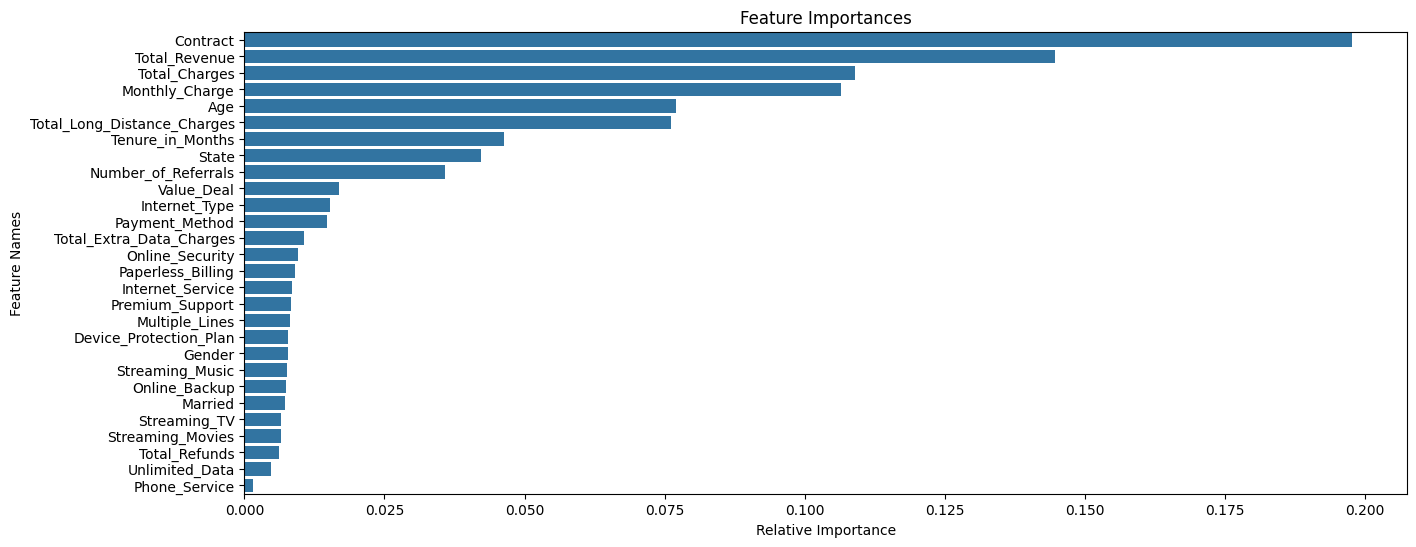

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


##Use Model for Prediction on New Data

In [ ]:


# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel('Prediction_Data.xlsx', sheet_name=s2)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv("Predictions.csv", index=False)


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   54598-TAM    Male   59      No      Tamil Nadu                   11   
1   56554-RAJ  Female   29     Yes       Rajasthan                    0   
2   57256-BIH  Female   18      No           Bihar                    9   
3   58044-KAR  Female   31      No       Karnataka                    5   
4   58974-MAD    Male   34      No  Madhya Pradesh                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                32        NaN           Yes             No  ...   
1                11     Deal 5           Yes             No  ...   
2                 7        NaN           Yes             No  ...   
3                13     Deal 5           Yes             No  ...   
4                14        NaN           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      19.750000     39.299999           0.0   
1    Credit Ca